Teach a model to predict importance better than rules.

Vectorization (TF-IDF / embeddings)
Train-test split
Model training (Logistic Regression)
Accuracy, precision, recall evaluation

scikit-learn
Used to teach the computer to decide whether an email is important or not based on patterns in past emails.

seaborn
Used to draw clean, nice-looking charts so you can visually understand things like important vs non-important emails.

matplotlib
Used to create basic graphs and plots (bar charts, line charts) to show results and trends in your email data.

In [1]:
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Load preprocessed dataset
import pandas as pd

df = pd.read_csv("../data/processed/emails_with_labels.csv")

df.head()


,From,To,Subject,Date,Body,ThreadKey,Filename,year,month,clean_body,clean_subject,email_length,num_recipients,sender_domain,label
0,msagel@home.com,jarnold@enron.com,Status,2000-11-16 17:30:00+00:00,John:\n?\nI'm not really sure what happened be...,"status::Thu, 16 Nov 2000 09:30:00 -0800",36.0,2000,11,john im not really sure what happened between...,status,556,1,home.com,1
1,slafontaine@globalp.com,john.arnold@enron.com,re:summer inverses,2000-12-08 13:05:00+00:00,i suck-hope youve made more money in natgas la...,"summer inverses::Fri, 08 Dec 2000 05:05:00 -0800",19.0,2000,12,i suckhope youve made more money in natgas las...,resummer inverses,267,1,globalp.com,0
2,iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...",The WTI Bullet swap contracts,2001-05-15 16:43:00+00:00,"Hi,\n\n\nFollowing the e-mail you have receive...","the wti bullet swap contracts::Tue, 15 May 200...",50.0,2001,5,hi following the email you have received yeste...,the wti bullet swap contracts,1009,2,intcx.com,1
3,jeff.youngflesh@enron.com,"anthony.gilmore@enron.com, colleen.koenig@enro...",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,2000-11-27 09:49:00+00:00,Conference Room TBD.\n\nThis meeting will be t...,invitation: ebs/gss meeting w/bristol babcock ...,3.0,2000,11,conference room tbd this meeting will be to di...,invitation ebsgss meeting wbristol babcock nov...,190,4,enron.com,1
4,caroline.abramo@enron.com,mike.grigsby@enron.com,Harvard Mgmt,2000-12-12 17:33:00+00:00,Mike- I have their trader coming into the offi...,"harvard mgmt::Tue, 12 Dec 2000 09:33:00 -0800",9.0,2000,12,mike i have their trader coming into the offic...,harvard mgmt,681,1,enron.com,0


In [3]:
df["label"].value_counts()


label
0    320189
1    196604
Name: count, dtype: int64

In [4]:
# Define features (X) and labels (y)
X = df["clean_subject"].fillna("") + " " + df["clean_body"].fillna("")
y = df["label"]


Splits your data into two parts:
80% → used to teach the model (training)
20% → used to check how good the model is (testing)

stratify=y
Keeps the same ratio of important vs not important emails in both parts, so the test is fair.

random_state=42
Makes the split repeatable, so you get the same result every time you run it.

In [5]:
# Train–test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


TF-IDF Vectorization is a way to turn email text into numbers by giving more importance to meaningful words and less importance to common words, so your system can decide which emails are important.

In [6]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words="english",
    min_df=5
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Logistic regression is a simple method that looks at email text and features and predicts whether an email is important or not (yes/no) based on patterns it has learned from earlier emails.

In [7]:
# Train classifier (Logistic Regression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_tfidf, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [8]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     64038
           1       0.99      0.95      0.97     39321

    accuracy                           0.98    103359
   macro avg       0.98      0.97      0.98    103359
weighted avg       0.98      0.98      0.98    103359



Precision (0.97 for 0, 0.99 for 1)
When the model says an email is important, it is almost always correct.

Recall (1.00 for 0, 0.95 for 1)
It catches almost all non-important emails
It catches most important emails, but misses a small number

F1-score (~0.98)
Overall balance between being accurate and not missing important emails → strong performance

Accuracy = 0.98 (98%)
Out of all emails, 98% are classified correctly

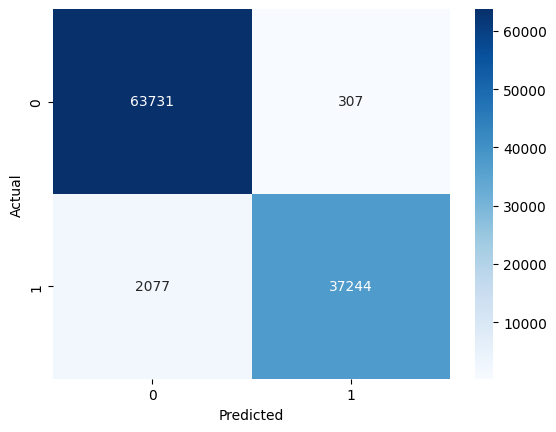

In [9]:
# Focus on precision & recall for class 1
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Creates a confusion matrix
It counts how many emails were:
correctly marked important
correctly marked not important
wrongly classified

Visualizes it as a heatmap
The blue chart makes it easy to see mistakes vs correct predictions at a glance.

Labels axes
X-axis → what the model predicted
Y-axis → what the email actually was

In [10]:
# Baseline comparison (Naive Bayes)
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

nb_preds = nb.predict(X_test_tfidf)

print(classification_report(y_test, nb_preds))


              precision    recall  f1-score   support

           0       0.85      0.92      0.88     64038
           1       0.85      0.75      0.79     39321

    accuracy                           0.85    103359
   macro avg       0.85      0.83      0.84    103359
weighted avg       0.85      0.85      0.85    103359



Uses Naive Bayes as a simple baseline model (a basic way to classify text).
Trains it on the same email data used before.
Predicts whether test emails are important or not.
Prints a report to see how this simple model perform

In [11]:
# Inference on new email (demo)
sample_email = """
Subject: Meeting Reminder
Body: Please be reminded that the contract discussion meeting
is scheduled for tomorrow at 10 AM.
"""

sample_vec = tfidf.transform([sample_email])
prediction = model.predict(sample_vec)

print("Important" if prediction[0] == 1 else "Not Important")


Important
